In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

# 1 - Explicar que diferencia hay entre el brillo y contraste.

Brillo y contraste son conceptos diferentes que son utilizados en diferentes campos como la optica, fotografia, astronomia y porcesamiento de imagenes. Brillo puede ser definido como la luminiscencia que un objeto genera en un observador. Contraste, por otro lado, puede ser definido como la separacion entre dos colores diferentes identificables. Este contraste puede ser aplicado a la imagen general, o a un kernel especifico de la imagen.

Brillo:

El brillo es una precepcion visual que genera que un observador vea la imagen como oscura o iluminada. Esto se puede ver claramente mas adelante en los histogramas de imagenes. Donde se ve una mayor distribucion de pixels en valores altos (imagen clara) o en valores bajos (imagen oscura).
Por esta cualidad, el brillo puede ser cuantifiaco como un promedio entre los valores r, g y b de un pixel. De manera que sigue la siguiente distribucion:

$$ \mu = \frac{R+G+B}{3}  $$

Contraste:

Contraste se trata mas sobre la propiedad del objeto en la imagen la cual lo hace facil de distinguir de otros objetos. Esto es gracias a el color y el brillo del objeto. Una forma de medir el contraste es con la formula de contraste de Weber, definida como:

$$ W = \frac{I-I_{b}}{I_{b}} $$

Donde I es el brillo del objeto e Ib es el brillo del fondo.

Diferencias entre brillo y contraste:

La mayor diferencia es que el brillo es una magnitud absoluta definida solamente por el color r, g y b del objeto. Mientras que el contraste es una magnitud relativa, la cual no depende solo del objeto sino que tambien de sus alrededores. Se puede pensar como el cambio de brillo en la imagen. El contraste tambien depende de los colores involucrados.

A continuacion se encuentra un ejemplo de aplicar diferentes cambios en brillo y contraste en una imagen.

# 2 - Escribir un código que modifique el brillo y contraste de una imagen.

In [2]:
def change_brightness(img, brightness = 0):
    if brightness > 0:
        alpha = (255-brightness)/255
        gamma = brightness
        return cv.addWeighted(img, alpha, img, 0, gamma)
    elif brightness < 0:
        alpha = (255+brightness)/255
        gamma = 0
        return cv.addWeighted(img, alpha, img, 0, gamma)
    elif brightness == 0:
        return img.copy()

def change_contrast(img, contrast = 0):
    if contrast == 0:
        return img.copy()
    else:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha = f
        gamma = 127*(1-f)       
        return cv.addWeighted(img, alpha, img, 0, gamma)

def change_brightness_and_contrast(img, brightness=0, contrast=0):    
    aux_img = change_brightness(img, brightness)
    aux_img = change_contrast(aux_img, contrast)
    return aux_img

In [3]:
# Filename
filename = './imags/led_zeppelin.jpg'
element = 'Jimmy and Robert'

# Show original image
example = cv.imread(filename=filename, flags=cv.IMREAD_COLOR)
a, b, _ = example.shape
example = cv.resize(example, (b//4,a//4), 0, 0, cv.INTER_AREA)
cv.imshow(winname=element, mat=example)
cv.waitKey(0)

s = 320
example = cv.imread(filename=filename, flags=cv.IMREAD_COLOR)
example = cv.resize(example, (s,s), 0, 0, cv.INTER_AREA)
font = cv.FONT_HERSHEY_DUPLEX
fcolor = (255,255,255)

blist = [0, -64, 64,   0,  0, 64] # list of brightness values
clist = [0,    0,   0, -64, 64, 64] # list of contrast values


out = np.zeros((s*2, s*3, 3), dtype = np.uint8)

for i, b in enumerate(blist):
    c = clist[i]
    row = s*int(i/3)
    col = s*(i%3)
    out[row:row+s, col:col+s] = change_brightness_and_contrast(example, b, c)
    msg = 'b %d' % b
    cv.putText(out,msg,(col,row+s-22), font, .7, fcolor, 1, cv.LINE_AA)
    msg = 'c %d' % c
    cv.putText(out,msg,(col,row+s-4), font, .7, fcolor, 1, cv.LINE_AA)  

cv.imshow(winname='Example', mat=out)
cv.waitKey(0)

-1

# 3 - Explicar que es un histograma de una imagen . Escribir un código para calcularlo.

El histograma de una imagen digital es una funcion dicreta donde se acumula en bins la cantidad de veces  que un valor r, g o  b del pixel aparece en la imagen. Por ejemplo, si se tienen valores de 0 a 255, se tendran 256 bins donde se van acumulando los valores que vuelven a repetirse. Suele normalizarse para ver el histograma como porcentaje del total de pixels en la imagen. Se puede calcular el histrograma de un valor en particular (r, g o b) o el histograma general  donde no se distingue por color. El histograma de una imagen da una idea de la distribuicion de los valores que componen la imagen y como consecuencia del brillo del mismo.

In [4]:
def plot_image_histogram(img,bins=256):
    b, g, r = cv.split(img)
    r_f = r.flatten()
    g_f = g.flatten()
    b_f = b.flatten()
    t = np.concatenate((b_f, g_f, r_f), axis=None)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    
    plt.figure(num=None, figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')
    plt.title('Image Red Historgam')
    plt.ylabel('Quantity')
    plt.xlabel('Value')
    plt.grid('on')
    plt.hist(r_f,bins=bins, color='red', ec='red')
    plt.show()
    
    plt.figure(num=None, figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')
    plt.title('Image Green Historgam')
    plt.ylabel('Quantity')
    plt.xlabel('Value')
    plt.grid('on')
    plt.hist(g_f,bins=bins, color='green', ec='green')
    plt.show()
    
    plt.figure(num=None, figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')
    plt.title('Image Blue Historgam')
    plt.ylabel('Quantity')
    plt.xlabel('Value')
    plt.grid('on')
    plt.hist(b_f,bins=bins, color='blue', ec='blue')
    plt.show()
    
    plt.figure(num=None, figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')
    plt.title('Image Luminance Historgam')
    plt.ylabel('Quantity')
    plt.xlabel('Value')
    plt.grid('on')
    plt.hist(t,bins=bins, color='gray', ec='gray')
    plt.show()
    

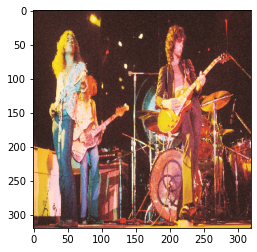

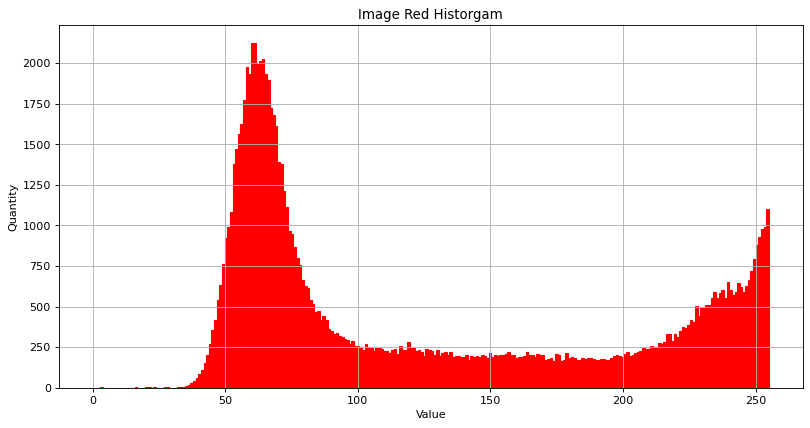

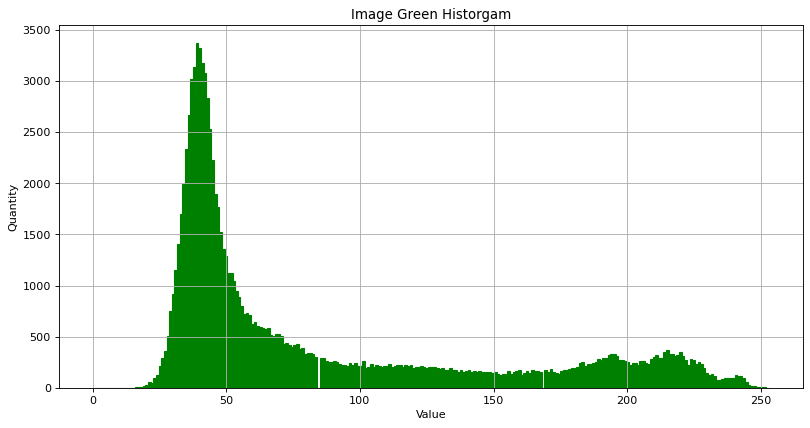

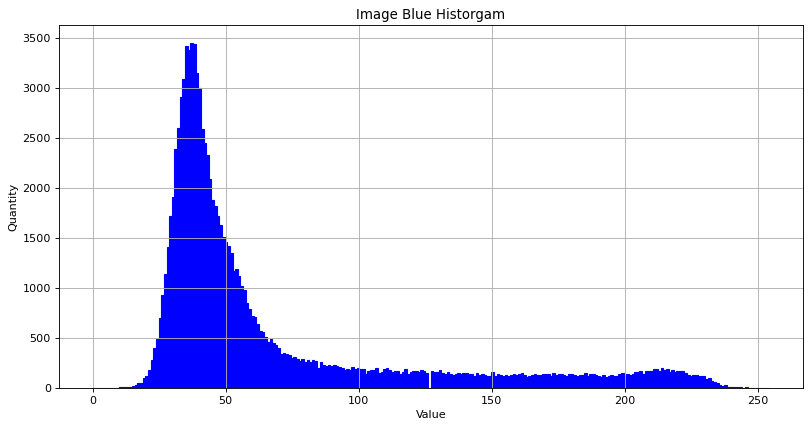

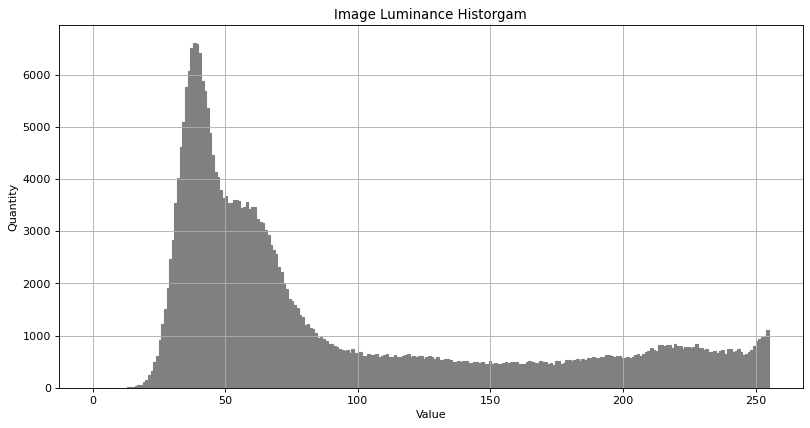

In [5]:
plot_image_histogram(example)

# 4 - Para que se usa la ecualización de un histograma? Dar ejemplos.

La ecualizacion de un histograma se usa generalmente para incrementar el contraste global de una imagen, especialmente cuando los datos de la imagen que son utiles estan representados con constraste muy cercano.
Este metodo es muy util en imagenes donde el fondo y el frente de la imagen tienen mismo brillo. Es decir, son ambos oscuros o ambos claros. Por ejemplo, es util para tener una mejor vista de la estructura de huesos en una imagen de rayos x, o en fotografias que tienen una exposicion mal. La ventaja de la ecualizacion de histogramas es que es una operacion sencilla y reversible. Por lo que con la funcion de equalizacion se puede volver a recuperar la imagen original. La desventaja de el metodo es que no discrimina, por lo que puede llegar a aumentar el contraste del ruido, decrementando la señal utilizable.
Generalmente, una ecualizacion de un histograma  produce imagenes poco realistas, pero es muy util para imagenes cientificas como imagenes termicas, de satelite o rayos x. Puede producir resultados poco deseables si se aplica a imagenes con poca profundidad de color. A continuacion se muestra un ejemplo en el cual produce un efecto deseable.

In [6]:
# Filename
filename = './imags/hist_equ.png'

img = cv.imread(filename=filename, flags=cv.IMREAD_GRAYSCALE)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side

In [7]:
cv.imshow(winname='Original vs Equalization', mat=res)
cv.waitKey(0)

-1

Se puede ver como mejoro el fondo de la imagen. Pero la cabeza se ve peor luego de la equalizacion, se perdio mucha informacion a causa de que tiene mucho brillo. Para solucionar este problema se utiliza equalizado adaptativo de la imagen. A continuacion se muestra el resultado final luego de utilizar esta ulitma tecnica.

In [8]:
# create a CLAHE object
clahe = cv.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
cl1 = clahe.apply(equ)

In [9]:
cv.imshow(winname='Original vs Equalization vs Adaptative Equalization', mat=np.hstack((res,cl1)))
cv.waitKey(0)

-1

# 5 - Dada la imagen del billete, aplicar bit plane slicing mostrar los resultados y reconstruir la imagen usando los planos 8-7-6-5-1 . Experimentar con diferentes planos.

In [10]:
def bitfield(n, length):
    arr = [1 if digit=='1' else 0 for digit in bin(n)[2:]]
    for i in range(length-len(arr)):
        arr.insert(0, 0) 
    return arr

def bit_plane_slicing(img): 
    a, b = img.shape
    c = len(bitfield(img[0][0],8))
    bit_array = np.zeros(shape=(a, b, c))
    for i in range(a):
        for j in range(b):
            bit_array[i][j] = bitfield(img[i][j], 8)
    return bit_array

In [11]:
# Filename
filename = './imags/onedollarbw.jpg'
element = 'One Dollar'

# Show original image
dollar = cv.imread(filename=filename, flags=cv.IMREAD_GRAYSCALE)
cv.imshow(winname=element, mat=dollar)
cv.waitKey(0)

-1

In [12]:
bit_image = bit_plane_slicing(dollar)

plane_8 = bit_image[:,:,0]*255
plane_7 = bit_image[:,:,1]*255
plane_6 = bit_image[:,:,2]*255
plane_5 = bit_image[:,:,3]*255
plane_4 = bit_image[:,:,4]*255
plane_3 = bit_image[:,:,5]*255
plane_2 = bit_image[:,:,6]*255
plane_1 = bit_image[:,:,7]*255

In [13]:
# Show Planes
mat_1 = np.hstack((plane_8, plane_7, plane_6, plane_5))
mat_2 = np.hstack((plane_4, plane_3, plane_2, plane_1))
mat_f = np.vstack((mat_1, mat_2))

a, b = mat_f.shape
mat_f = cv.resize(mat_f, (b//2,a), 0, 0, cv.INTER_AREA)

cv.imshow(winname=element, mat=mat_f)
cv.waitKey(0)

-1

In [14]:
def rec_img(rec_array, planes):
    a, b = planes[0].shape
    rec = np.zeros(shape=(a, b))
    for i in range(a):
        for j in range(b):
            for k in range(len(rec_array)):
                rec[i][j] = rec[i][j] + rec_array[k]*(planes[k][i][j]/255)*(2**(7-k))
    return rec

In [15]:
# Reconstruct Image

rec_1 = [1,1,1,1,0,0,0,1]
rec_2 = [1,1,1,1,0,0,0,0]
rec_3 = [1,1,1,0,0,0,1,1]
rec_4 = [1,1,0,0,0,0,0,1]
rec_arrs = [rec_1, rec_2, rec_3, rec_4]
planes = [plane_8, plane_7, plane_6, plane_5, plane_4, plane_3, plane_2, plane_1]
imgs = []

for rec in rec_arrs:
    new_img = rec_img(rec, planes)
    imgs.append(new_img.astype(np.uint8))

In [16]:
for img in imgs:
    cv.imshow(winname='Reconstructed Image', mat=img)
    cv.waitKey(0)

# 6- Dada la imagen del globo ocular buscar transformaciones que permitan resaltar las venas lo mejor posible.

In [17]:
# Filename
filename = './imags/eyebw.jpg'
element = 'Globe (human eye)'

# Show original image
eye = cv.imread(filename=filename, flags=cv.IMREAD_GRAYSCALE)
cv.imshow(winname=element, mat=eye)
cv.waitKey(0)

-1

## Image Negatives

In [18]:
img_neg = 255 - eye
# img_neg = change_brightness_and_contrast(img_neg, contrast=64)
cv.imshow(winname='Image Negative', mat=img_neg)
cv.waitKey(0)

-1

## Log Transformations

In [19]:
c = 300
img_log = c*np.log(1+eye)
img_log = img_log.astype(np.uint8)
cv.imshow(winname='Log Transformation', mat=img_log)
cv.waitKey(0)

-1

## Power-Law (Gamma) Transformations

In [20]:
c = 0.8
gamma = 1.1
img_gam = c*np.power(eye,gamma)
img_gam = img_gam.astype(np.uint8)
cv.imshow(winname='Power-Law (Gamma) Transformation', mat=img_gam)
cv.waitKey(0)

-1

La mejor transformacion para resaltar las venas del globo ocular es una transformacion negativa con un aumento del contraste y adaptative histogram equalization:

In [35]:
img_neg = 255 - eye
img_f = change_brightness_and_contrast(img_neg, brightness=-32, contrast=64) 
res = np.hstack((eye,img_f))
equ = cv.equalizeHist(img_f)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(2,2))
cl1 = clahe.apply(equ)
res = np.hstack((eye,cl1))
cv.imshow(winname='Highlighted vs Equalized', mat=res)
cv.waitKey(0)

-1

# 7 - High Dynamic Range (HDR) Imaging
# Investigar que es HDR y aplicarlo a las imágenes office_x.jpg (x=1-6)
# Tiempos de exposicion : [0.0333, 0.1000, 0.3333, 0.6250, 1.3000, 4.0000]
# Leer https://www.learnopencv.com/high-dynamic-range-hdr-imaging-using-opencv-cpp-python/

In [36]:
def loadExposureSeq(path):
    images = []
    times = []
    with open(os.path.join(path, 'list.txt')) as f:
        content = f.readlines()
    for line in content:
        tokens = line.split()
        images.append(cv.imread(os.path.join(path, tokens[0])))
        times.append(float(tokens[1]))
    return images, np.asarray(times, dtype=np.float32)

In [37]:
images, times = loadExposureSeq('./imags/HDR')

In [38]:
# Estimate camera response
calibrate = cv.createCalibrateDebevec()
response = calibrate.process(images, times)
# Make HDR image
merge_debevec = cv.createMergeDebevec()
hdr = merge_debevec.process(images, times, response)
cv.imwrite('hdr.hdr', hdr)
cv.imshow(winname='HDR Image', mat=hdr)
cv.waitKey(0)

-1

In [39]:
# Tonemap using Drago's method to obtain 24-bit color image
tonemapDrago = cv.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdr)
ldrDrago = 3 * ldrDrago
cv.imshow(winname='Drago Tonemap Image', mat=ldrDrago)
cv.waitKey(0)

-1

In [42]:
# Tonemap using Reinhard's method to obtain 24-bit color image
tonemapReinhard = cv.createTonemapReinhard(1.5, 0,0,0)
ldrReinhard = tonemapReinhard.process(hdr)
cv.imshow(winname='Reinhard Tonemap Image', mat=ldrReinhard)
cv.waitKey(0)

-1

In [41]:
# Tonemap using Mantiuk's method to obtain 24-bit color image
tonemapMantiuk = cv.createTonemapMantiuk(2.2,0.85, 1.2)
ldrMantiuk = tonemapMantiuk.process(hdr)
ldrMantiuk = 3 * ldrMantiuk
cv.imshow(winname='Mantiuk Tonemap Image', mat=ldrMantiuk)
cv.waitKey(0)

-1

Se puede apreciar como para este caso el tonemap con el metodo de Reinhard es el mas adecuado.